# Data Description

You can get data from WHO : https://data.who.int/dashboards/covid19/data

| Field name | Type | Description |
| --- | --- | --- |
| Date_reported | Date | Date of reporting to WHO |
| Country_code | String | ISO Alpha-2 country code |
| Country | String | Country, territory, area |
| WHO_region | String | WHO regional offices: WHO Member States are grouped into six WHO regions -- Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO). |
| New_cases | Integer | New confirmed cases. Calculated by subtracting previous cumulative case count from current cumulative cases count.* |
| Cumulative_cases | Integer | Cumulative confirmed cases reported to WHO to date. |
| New_deaths | Integer | New confirmed deaths. Calculated by subtracting previous cumulative deaths from current cumulative deaths.* |
| Cumulative_deaths | Integer | Cumulative confirmed deaths reported to WHO to date. |

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

# Exploring the Data

In [ ]:
df = pd.read_csv('https://srhdpeuwpubsa.blob.core.windows.net/whdh/COVID/WHO-COVID-19-global-daily-data.csv')
df.head()

Date_reported Country_code     Country WHO_region  New_cases  \
0    2020-01-04           AI    Anguilla        AMR        NaN   
1    2020-01-04           AZ  Azerbaijan        EUR        NaN   
2    2020-01-04           BD  Bangladesh       SEAR        0.0   
3    2020-01-04           BB    Barbados        AMR        NaN   
4    2020-01-04           BR      Brazil        AMR        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         0.0                  0  
3                 0         NaN                  0  
4                 0         NaN                  0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491040 entries, 0 to 491039
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      491040 non-null  object 
 1   Country_code       488994 non-null  object 
 2   Country            491040 non-null  object 
 3   WHO_region         491040 non-null  object 
 4   New_cases          210491 non-null  float64
 5   Cumulative_cases   491040 non-null  int64  
 6   New_deaths         154004 non-null  float64
 7   Cumulative_deaths  491040 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 30.0+ MB


In [ ]:
df.describe()

New_cases  Cumulative_cases     New_deaths  Cumulative_deaths
count  2.104910e+05      4.910400e+05  154004.000000       4.910400e+05
mean   3.698457e+03      2.048701e+06      46.102075       2.170254e+04
std    4.854707e+04      8.534154e+06     242.336641       8.689096e+04
min   -6.507900e+04      0.000000e+00   -3520.000000       0.000000e+00
25%    3.000000e+00      6.607000e+03       0.000000       4.000000e+01
50%    6.100000e+01      5.988600e+04       2.000000       6.900000e+02
75%    6.760000e+02      6.611030e+05      15.000000       7.959250e+03
max    6.966046e+06      1.034368e+08   44047.000000       1.226351e+06

In [ ]:
# change float format in description
pd.options.display.float_format = '{:,.1f}'.format
df.describe()

New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
count   210,491.0         491,040.0   154,004.0          491,040.0
mean      3,698.5       2,048,701.1        46.1           21,702.5
std      48,547.1       8,534,154.3       242.3           86,891.0
min     -65,079.0               0.0    -3,520.0                0.0
25%           3.0           6,607.0         0.0               40.0
50%          61.0          59,886.0         2.0              690.0
75%         676.0         661,103.0        15.0            7,959.2
max   6,966,046.0     103,436,829.0    44,047.0        1,226,351.0

> Some Pandas Options can be found here : https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [ ]:
df.describe(include='object')

Date_reported Country_code   Country WHO_region
count         491040       488994    491040     491040
unique          2046          239       240          7
top       2025-08-10           AI  Anguilla        EUR
freq             240         2046      2046     126852

# Duplicate Values

In [ ]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

# Missing Values

In [ ]:
# Check Missing Values
df.isnull().sum()

Date_reported             0
Country_code           2046
Country                   0
WHO_region                0
New_cases            280549
Cumulative_cases          0
New_deaths           337036
Cumulative_deaths         0
dtype: int64

In [ ]:
round(df.isna().mean() * 100 ,2)

Date_reported        0.0
Country_code         0.4
Country              0.0
WHO_region           0.0
New_cases           57.1
Cumulative_cases     0.0
New_deaths          68.6
Cumulative_deaths    0.0
dtype: float64

In [ ]:
df[(df.Country == 'Egypt') & (df.Date_reported.between('2022-03-01', '2022-04-01'))]

Date_reported Country_code Country WHO_region  New_cases  \
189041    2022-03-01           EG   Egypt        EMR    1,523.0   
189189    2022-03-02           EG   Egypt        EMR    1,322.0   
189521    2022-03-03           EG   Egypt        EMR    1,288.0   
189669    2022-03-04           EG   Egypt        EMR    1,261.0   
190001    2022-03-05           EG   Egypt        EMR    1,121.0   
190150    2022-03-06           EG   Egypt        EMR    1,113.0   
190482    2022-03-07           EG   Egypt        EMR    1,093.0   
190628    2022-03-08           EG   Egypt        EMR      923.0   
190962    2022-03-09           EG   Egypt        EMR      882.0   
191108    2022-03-10           EG   Egypt        EMR      884.0   
191441    2022-03-11           EG   Egypt        EMR      861.0   
191589    2022-03-12           EG   Egypt        EMR      854.0   
191920    2022-03-13           EG   Egypt        EMR        NaN   
192069    2022-03-14           EG   Egypt        EMR        NaN   
192401    2022-03-15           EG   Egypt        EMR        NaN   
192549    2022-03-16           EG   Egypt        EMR        NaN   
192881    2022-03-17           EG   Egypt        EMR        NaN   
193029    2022-03-18           EG   Egypt        EMR        NaN   
193361    2022-03-19           EG   Egypt        EMR    5,516.0   
193509    2022-03-20           EG   Egypt        EMR        NaN   
193841    2022-03-21           EG   Egypt        EMR        NaN   
193989    2022-03-22           EG   Egypt        EMR        NaN   
194321    2022-03-23           EG   Egypt        EMR        NaN   
194470    2022-03-24           EG   Egypt        EMR        NaN   
194802    2022-03-25           EG   Egypt        EMR        NaN   
194949    2022-03-26           EG   Egypt        EMR    4,375.0   
195282    2022-03-27           EG   Egypt        EMR        NaN   
195428    2022-03-28           EG   Egypt        EMR        NaN   
195761    2022-03-29           EG   Egypt        EMR        NaN   
195909    2022-03-30           EG   Egypt        EMR        NaN   
196241    2022-03-31           EG   Egypt        EMR        NaN   
196389    2022-04-01           EG   Egypt        EMR        NaN   

        Cumulative_cases  New_deaths  Cumulative_deaths  
189041            483771        34.0              24074  
189189            485093        36.0              24110  
189521            486381        22.0              24132  
189669            487642        17.0              24149  
190001            488763        13.0              24162  
190150            489876        10.0              24172  
190482            490969        25.0              24197  
190628            491892        25.0              24222  
190962            492774        22.0              24244  
191108            493658        13.0              24257  
191441            494519        12.0              24269  
191589            495373         8.0              24277  
191920            495373         NaN              24277  
192069            495373         NaN              24277  
192401            495373         NaN              24277  
192549            495373         NaN              24277  
192881            495373         NaN              24277  
193029            495373         NaN              24277  
193361            500889        84.0              24361  
193509            500889         NaN              24361  
193841            500889         NaN              24361  
193989            500889         NaN              24361  
194321            500889         NaN              24361  
194470            500889         NaN              24361  
194802            500889         NaN              24361  
194949            505264        56.0              24417  
195282            505264         NaN              24417  
195428            505264         NaN              24417  
195761            505264         NaN              24417  
195909            505264         NaN              24417

> New Cases may be not be reported daily

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.sample()

date_reported country_code  country who_region  new_cases  \
124417    2021-06-05           CZ  Czechia        EUR      336.0   

        cumulative_cases  new_deaths  cumulative_deaths  
124417           1683789         7.0              30427

# Date_reported

In [ ]:
df.date_reported.dtype

dtype('O')

In [ ]:
df.date_reported.describe()

count         491040
unique          2046
top       2025-08-10
freq             240
Name: date_reported, dtype: object

In [ ]:
df.date_reported.min(), df.date_reported.max()

('2020-01-04', '2025-08-10')

In [ ]:
# Not applicable
# df.date_reported.max() - df.date_reported.min()

In [ ]:
# Change date column to datetime
df['date_reported'] = pd.to_datetime(df['date_reported'], format='%Y-%m-%d')

In [ ]:
df['date_reported'].dtype

dtype('<M8[ns]')

In [ ]:
df['date_reported'].dtype.type

numpy.datetime64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491040 entries, 0 to 491039
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date_reported      491040 non-null  datetime64[ns]
 1   country_code       491040 non-null  object        
 2   country            491040 non-null  object        
 3   who_region         491040 non-null  object        
 4   new_cases          491040 non-null  float64       
 5   cumulative_cases   491040 non-null  int64         
 6   new_deaths         491040 non-null  float64       
 7   cumulative_deaths  491040 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 30.0+ MB


In [ ]:
# Available now
df.date_reported.max() - df.date_reported.min()

Timedelta('2045 days 00:00:00')

In [ ]:
total_period = df.date_reported.max() - df.date_reported.min()

# change to years, months, days
total_years = total_period/ np.timedelta64(365, 'D')         # could be  D, W, h, m, s
total_months = total_period/ np.timedelta64(30, 'D')
total_days = total_period/ np.timedelta64(1, 'D')

print(f'Total period: {total_period}')
print(f'Total years: {total_years:.2f}')
print(f'Total months: {total_months:.2f}')
print(f'Total days: {total_days}')

Total period: 2045 days 00:00:00
Total years: 5.60
Total months: 68.17
Total days: 2045.0


In [ ]:
from dateutil.relativedelta import relativedelta

relativedelta(df.date_reported.max(), df.date_reported.min())

relativedelta(years=+5, months=+7, days=+6)

In [ ]:
from datetime import datetime

# Get the current date
current_date = datetime.now()    # can specify time zone
current_date

datetime.datetime(2025, 8, 27, 9, 22, 15, 732682)

In [ ]:
current_date = datetime.today()
current_date

datetime.datetime(2025, 8, 27, 9, 22, 15, 740911)

In [ ]:
relativedelta(df.date_reported.max(), current_date)

relativedelta(days=-17, hours=-9, minutes=-22, seconds=-16, microseconds=+259089)

In [ ]:
relativedelta(current_date, df.date_reported.max())

relativedelta(days=+17, hours=+9, minutes=+22, seconds=+15, microseconds=+740911)

# Country_code and Country

In [ ]:
df.country_code.nunique(), df.country.nunique()

(240, 240)

In [ ]:
df.drop('country_code', axis =1, inplace=True)

In [ ]:
df.country.unique()

array(['Anguilla', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Brazil',
       'Canada', 'Colombia', 'Comoros', 'Cook Islands', 'Cura�ao',
       'Dominica', 'Dominican Republic', 'Falkland Islands (Malvinas)',
       'Gabon', 'Guadeloupe', 'India', 'Iran (Islamic Republic of)',
       'Ireland', 'Isle of Man', 'Jordan', 'Lesotho', 'Malawi', 'Nauru',
       'Qatar', 'Romania', 'Rwanda', 'Saint Vincent and the Grenadines',
       'Senegal', 'Solomon Islands', 'Sri Lanka', 'Syrian Arab Republic',
       'Tajikistan', 'Thailand', 'United Arab Emirates',
       'United Republic of Tanzania',
       'Venezuela (Bolivarian Republic of)', 'Austria', 'Belgium',
       'Bermuda', 'Burkina Faso', 'Burundi', 'Cambodia', 'Chad',
       'Denmark', 'French Guiana', 'Grenada', 'Japan', 'Jersey', 'Monaco',
       'New Zealand', 'Nigeria', 'Papua New Guinea', 'Peru',
       'Russian Federation', 'Saint Kitts and Nevis', 'Seychelles',
       'Sint Maarten (Dutch part)', 'South Sudan', 'Timor-Leste',
      

In [ ]:
'Egypt' in df.country.unique()

True

# Filter by Country

In [ ]:
df[df.country == 'Egypt'].shape

(2046, 7)

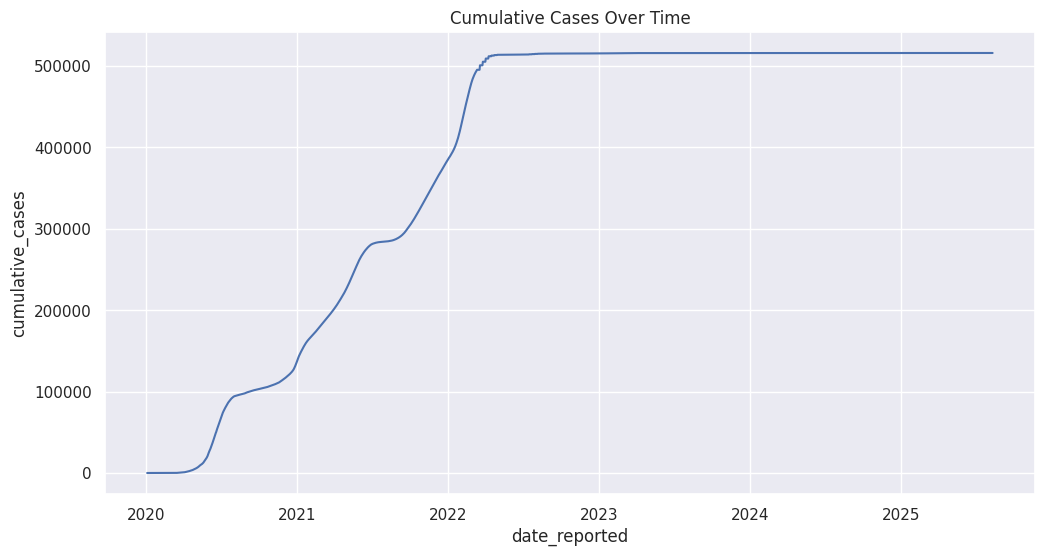

In [ ]:
# plot cumulative cases over time
plt.figure(figsize=(12,6))
sns.lineplot(x='date_reported', y='cumulative_cases', data=df[df.country == 'Egypt'])
plt.title('Cumulative Cases Over Time')
plt.show()


In [ ]:
# plotly express
px.line(df[df.country == 'Egypt'], x='date_reported', y='cumulative_cases')

In [ ]:
px.line(df[df.country == 'Egypt'], x='date_reported', y='cumulative_cases',
         title='Cumulative Cases Over Time', width=800, height=400)

In [ ]:
# Function to plot line plot for a country
def cumulative_cases(country):
    fig = px.line(df[df.country == country], x='date_reported', y='cumulative_cases',
                    title= f'Cumulative Cases Over Time for {country}', width=800, height=400)
    fig.show()

In [ ]:
cumulative_cases('Egypt')

In [ ]:
cumulative_cases('United States of America')

In [ ]:
def cumulative_deaths(country):
    fig = px.line(df[df.country == country], x='date_reported', y='cumulative_deaths',
                     title= f'Cumulative Cases Over Time for {country}', width=800, height=400)
    fig.show()

In [ ]:
cumulative_deaths('Egypt')

In [ ]:
cumulative_deaths('United States of America')

In [ ]:
# Cumulative cases for a specific country over specific period
def cumulative_cases_period(country, start_date, end_date):
    data = df[(df.country == country) & (df.date_reported.between(start_date, end_date))]
    fig = px.line(data, x='date_reported', y='cumulative_cases', title= f'Cumulative Cases for {country} from {start_date} to {end_date}', width=800, height=400)
    fig.show()

In [ ]:
cumulative_cases_period('Egypt', '2020-03-01', '2020-05-01')

In [ ]:
# Cumulative deaths for a specific country over specific period
def cumulative_deaths_period(country, start_date, end_date):
    data = df[(df.country == country) & (df.date_reported.between(start_date, end_date))]
    fig = px.line(data, x='date_reported', y='cumulative_deaths',
             title= f'Cumulative Deaths for {country} from {start_date} to {end_date}', width=800, height=400, markers=True)
    fig.show()

In [ ]:
cumulative_deaths_period('Egypt', '2020-03-01', '2020-05-01')

# Filter by year

In [ ]:
# Create Columns for year, month
df['year'] = df.date_reported.dt.year
df['month'] = df.date_reported.dt.month

In [ ]:
df.head()

date_reported     country who_region  new_cases  cumulative_cases  \
0    2020-01-04    Anguilla        AMR        0.0                 0   
1    2020-01-04  Azerbaijan        EUR        0.0                 0   
2    2020-01-04  Bangladesh       SEAR        0.0                 0   
3    2020-01-04    Barbados        AMR        0.0                 0   
4    2020-01-04      Brazil        AMR        0.0                 0   

   new_deaths  cumulative_deaths  year  month  
0         0.0                  0  2020      1  
1         0.0                  0  2020      1  
2         0.0                  0  2020      1  
3         0.0                  0  2020      1  
4         0.0                  0  2020      1

<Axes: xlabel='month', ylabel='new_cases'>

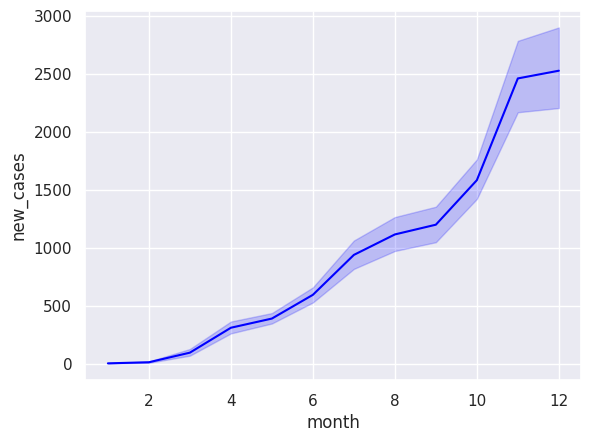

In [ ]:
sns.lineplot(x='month', y='new_cases', data=df[df.year == 2020], color='blue')

Text(0.5, 1.0, 'New Cases Over Time')

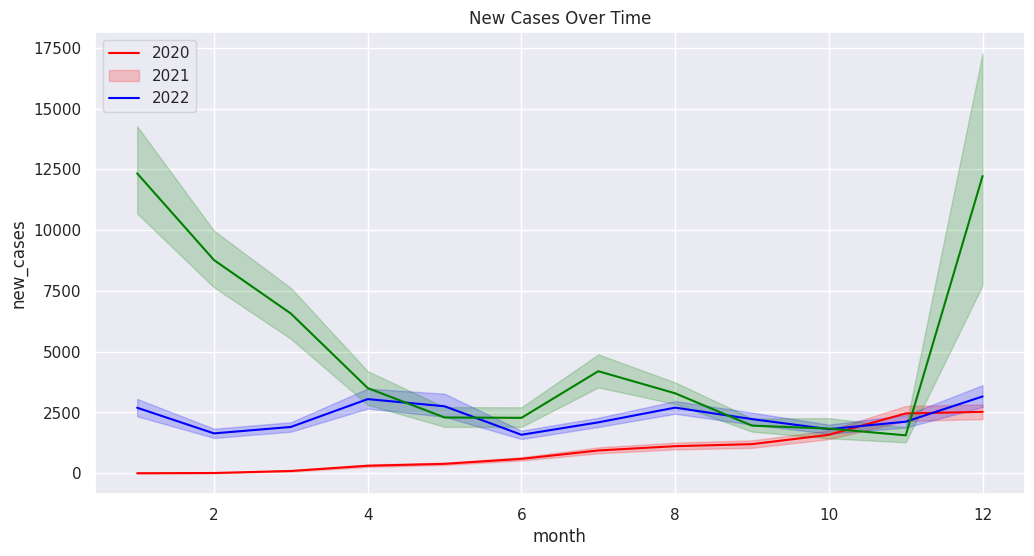

In [ ]:
# Plot cumulative cases for each year
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='new_cases', data=df[df.year == 2020], color='red')
sns.lineplot(x='month', y='new_cases', data=df[df.year == 2021], color='blue')
sns.lineplot(x='month', y='new_cases', data=df[df.year == 2022], color='green')

plt.legend(['2020', '2021', '2022'])
plt.title('New Cases Over Time')

<Axes: xlabel='month', ylabel='new_cases'>

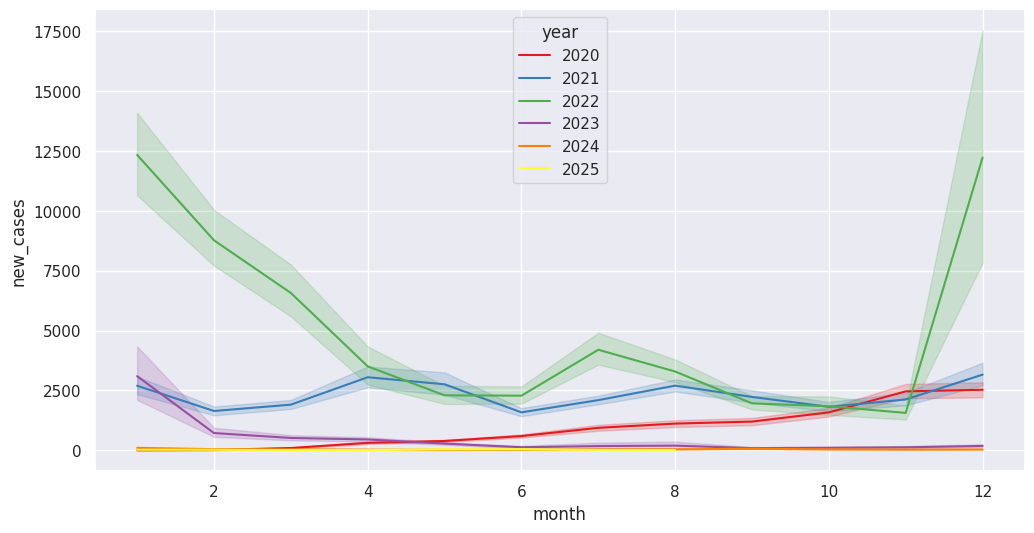

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='new_cases', hue ='year', data=df, palette='Set1')

# Total Cases

In [ ]:
df[df.year==2022].groupby('month')['new_cases'].mean()

month
1    12,337.2
2     8,769.6
3     6,570.1
4     3,503.9
5     2,294.5
6     2,280.1
7     4,198.4
8     3,289.1
9     1,958.9
10    1,839.0
11    1,560.5
12   12,228.9
Name: new_cases, dtype: float64

In [ ]:
df.groupby('year')['new_cases'].sum()

year
2020    82,335,574.0
2021   203,111,242.0
2022   444,029,532.0
2023    44,321,756.0
2024     3,558,499.0
2025     1,135,329.0
Name: new_cases, dtype: float64

<Axes: xlabel='month', ylabel='new_cases'>

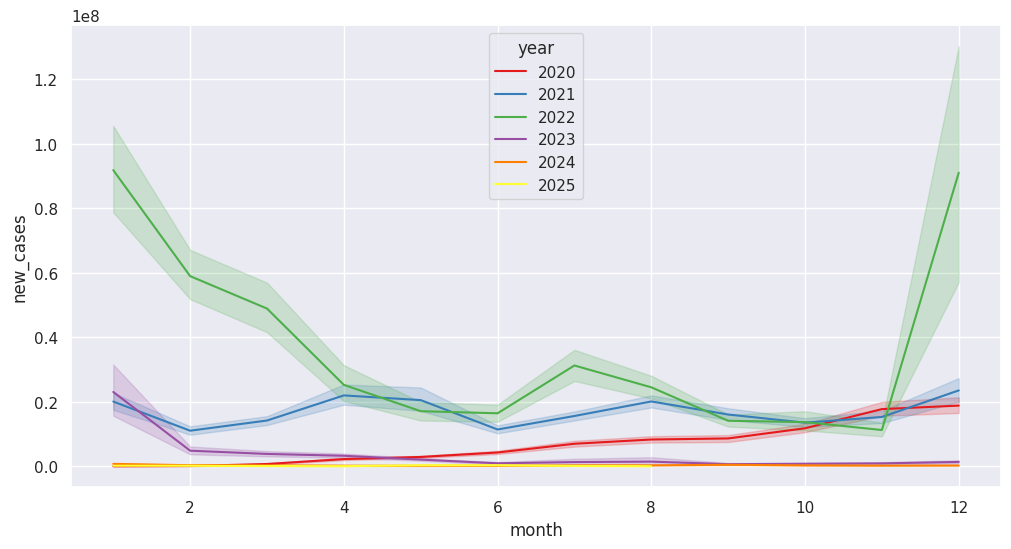

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='new_cases', hue ='year', data=df, palette='Set1', estimator=np.sum)

In [ ]:
df['month_year'] = df.date_reported.dt.to_period('M').astype(str)
df.sample(5)

date_reported country who_region  new_cases  cumulative_cases  \
482130    2025-07-04    Togo        AFR        0.0             39553   
480918    2025-06-29  Tuvalu        WPR        0.0              2943   
400368    2024-07-29  Monaco        EUR        0.0             17181   
119013    2021-05-13   India       SEAR  362,727.0          23703665   
39863     2020-06-18   Qatar        EMR    1,097.0             83174   

        new_deaths  cumulative_deaths  year  month month_year  
482130         0.0                290  2025      7    2025-07  
480918         0.0                  1  2025      6    2025-06  
400368         0.0                 67  2024      7    2024-07  
119013     4,120.0             258317  2021      5    2021-05  
39863          2.0                 82  2020      6    2020-06

In [ ]:
px.bar(df, x='month_year', y='new_cases', title='New Cases Over Time')

In [ ]:
px.histogram(df, x='month_year', y='new_cases', color='year', title='New Cases Over Time')

In [ ]:
def total_cases(country, start_date = df.date_reported.min(), end_date = df.date_reported.max()):
    data = df[df.country == country]
    fig = px.histogram(data, x='month_year', y='new_cases', color='year', title=f'Total Cases for {country}',
         width=800, height=400, range_x=[start_date, end_date], nbins=50)
    fig.show()

In [ ]:
total_cases('Egypt')

In [ ]:
total_cases('Egypt', '2020-03', '2021-03')

In [ ]:
total_cases('Egypt', '2020-03-15', '2021-05-15')

# Filter by Region

In [ ]:
df.who_region.unique()

array(['AMR', 'EUR', 'SEAR', 'AFR', 'WPR', 'EMR', 'OTHER'], dtype=object)

In [ ]:
df[df.who_region == 'EMR'].country.unique()            # WHO Regional Office for the Eastern Mediterranean

array(['Iran (Islamic Republic of)', 'Jordan', 'Qatar',
       'Syrian Arab Republic', 'United Arab Emirates', 'Egypt', 'Libya',
       'Afghanistan', 'Somalia', 'Bahrain', 'Iraq', 'Lebanon', 'Oman',
       'Saudi Arabia', 'Djibouti', 'Kuwait', 'Morocco',
       'occupied Palestinian territory, including east Jerusalem',
       'Pakistan', 'Sudan', 'Tunisia', 'Yemen'], dtype=object)

In [ ]:
def total_cases_region(region, start_date = df.date_reported.min(), end_date = df.date_reported.max()):
    data = df[df.who_region == region]
    fig = px.histogram(data, x='month_year', y='new_cases', color='year', title=f'Total Cases for {region}',
         width=800, height=400, range_x=[start_date, end_date])
    fig.show()

In [ ]:
total_cases_region('EMR')

In [ ]:
px.bar(df.groupby('who_region')['new_cases'].sum().sort_values(ascending=False),
         title='Total Cases by WHO Region', width=800, height=400)

# Top Countries

In [ ]:
data = df.groupby('country')['new_cases'].sum().sort_values(ascending=False)
px.bar(data, title='Total Cases by Country', width=1400, height=800)

In [ ]:
data = df.groupby('country')['cumulative_cases'].max().sort_values(ascending=False)
px.bar(data, title='Cumulative Cases by Country', width=1400, height=800)

In [ ]:
data = df[df['who_region'] == 'EMR'].groupby('country')['cumulative_cases'].max().sort_values(ascending=False)
px.bar(data, title='Cumulative Cases by Country in EMR Region', width=800, height=800)

In [ ]:
data = df[df['who_region'] == 'EMR'].groupby('country')['cumulative_deaths'].max().sort_values(ascending=False)
fig = px.bar(data, title='Cumulative Deaths by Country in EMR Region', width=800, height=800)
fig.update(layout_showlegend=False)
fig.show()

In [ ]:
df[df['new_cases'] < 0]

In [ ]:
df[df['new_deaths'] < 0]

* New Cases and New Deaths may be negative due to data correction as per WHO

In [ ]:
df[df.new_cases == df.new_cases.max()]

In [ ]:
df.query('new_cases == new_cases.max()')

In [ ]:
max_new_cases = df[df.new_cases == df.new_cases.max()]
max_new_cases['country']

In [ ]:
max_new_cases['country'].iloc[0]

In [ ]:
max_new_cases['country'].values

In [ ]:
max_new_cases['country'].values[0]

In [ ]:
print(f'The country with the most new cases is {max_new_cases["country"].iloc[0]} ')
print(f'The date with the most new cases is {max_new_cases["date_reported"].iloc[0]} ')

In [ ]:
max_new_cases.date_reported.dt.day_name()

In [ ]:
max_new_cases.date_reported.dt.day_name().values[0]

In [ ]:
# change date format
max_new_cases.date_reported.dt.strftime('%d-%m-%Y')

In [ ]:
max_new_cases.date_reported.dt.strftime('%d-%m-%Y').iloc[0]

In [ ]:
max_new_cases.date_reported.iloc[0]

In [ ]:
df.date_reported = df.date_reported.dt.strftime('%d-%m-%Y')

In [ ]:
df.date_reported.dtype

In [ ]:
max_new_cases.date_reported.iloc[0]

In [ ]:
max_new_cases = df[df.new_cases == df.new_cases.max()]
max_new_cases.date_reported.iloc[0]

In [ ]:
df.groupby('country')['new_cases'].max().nlargest(10)

In [ ]:
fig = px.bar(df.groupby('country')['new_cases'].max().nlargest(10), title='Top 10 Countries with the Most New Cases', width=800, height=600)
fig.update(layout_showlegend=False)
fig.update_layout(xaxis_title='Country', yaxis_title='New Cases')
fig.show()

In [ ]:
fig = px.bar(df.groupby('country')['new_deaths'].max().nlargest(10),
         title='Top 10 Countries with the Most New Deaths', width=800, height=600, orientation='h')
fig.update(layout_showlegend=False)
fig.update_layout(xaxis_title='Country', yaxis_title='New Deaths')
fig.show()

In [ ]:
fig = px.bar(df.groupby('country')['new_deaths'].max().nlargest(10).sort_values(ascending= True),
         title='Top 10 Countries with the Most New Deaths', width=800, height=600, orientation='h')
fig.update(layout_showlegend=False)
fig.update_layout(xaxis_title='Country', yaxis_title='New Deaths')
fig.show()

In [ ]:
def top10_countries(data, column):
    data = data.groupby('country')[column].max().nlargest(10)
    fig = px.bar(data, title=f'Top 10 Countries with the Most {column}', width=800, height=600)
    fig.update(layout_showlegend=False)
    fig.update_layout(xaxis_title='Country', yaxis_title=column)
    fig.show()

In [ ]:
top10_countries(df, 'new_cases')

In [ ]:
top10_countries(df, 'new_deaths')

In [ ]:
top10_countries(df, 'cumulative_cases')

In [ ]:
top10_countries(df, 'cumulative_deaths')

In [ ]:
# 4 subplots in one figure plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
data = df.groupby('country').max()
data

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('New Cases', 'New Deaths', 'Cumulative Cases', 'Cumulative Deaths'))

fig.add_trace(go.Bar(x=data['new_cases'].nlargest(10).index, y=data['new_cases'].nlargest(10).values), row=1, col=1)
fig.add_trace(go.Bar(x=data['new_deaths'].nlargest(10).index, y=data['new_deaths'].nlargest(10).values), row=1, col=2)
fig.add_trace(go.Bar(x=data['cumulative_cases'].nlargest(10).index, y=data['cumulative_cases'].nlargest(10).values), row=2, col=1)
fig.add_trace(go.Bar(x=data['cumulative_deaths'].nlargest(10).index, y=data['cumulative_deaths'].nlargest(10).values), row=2, col=2)


fig.update(layout_showlegend=False)
fig.update_layout(height=900, width=1200, title_text='Top 10 Countries with the Most Cases and Deaths')
fig.show()

# Create Easy Maps

In [ ]:
df_all_max = df.groupby('country').max()
df_2021_max = df[df.year == 2021].groupby('country').max()
df_2022_max = df[df.year == 2022].groupby('country').sum()

In [ ]:
px.choropleth(df_all_max, locations=df_all_max.index, locationmode='country names', color=df_all_max['cumulative_cases'],
            width= 1000, height= 600, title='World wide Cumulative Cases covid19 cases', color_continuous_scale='Reds')  # Try Greens, Purples, Blues

# More Sophisticated Maps

Implemented according to : https://medium.com/analytics-vidhya/hello-world-covid19-visualization-eb6736e1dec with some modifications

In [ ]:
data = dict(type = 'choropleth',                    #  ‘choropleth’ specifies that we are plotting a choropleth map
           locations = df_2021_max.index,           # list of country names
            locationmode = 'country names',         # the plotting level is country wise. The value can be “ISO-3” , “USA-states” , “country names”
            z = df_2021_max['cumulative_cases'],    # The value or factor that is used to distinguish the countries. These values are used by the colour scale.
            text = df_2021_max.index,               # The textual information to be displayed for each country on hover.
            colorscale= 'agsunset',
            reversescale = False,
            marker = dict(line = dict(color='white',width=1)),
            colorbar = {'title':'cumulative_cases'})

Available color scales are:

> ‘Greys’, ‘YlGnBu’, ‘Greens’, ‘YlOrRd’, ‘Bluered’, ‘RdBu’, ‘Reds’, ‘Blues’, ‘Picnic’, ‘Rainbow’, ‘Portland’, ‘Jet’, ‘Hot’, ‘Blackbody’, ‘Earth’, ‘Electric’, ‘Viridis’, ‘Cividis’

In [ ]:
layout = dict(title = 'World wide Cumulative Cases in 2021',
             geo = dict(showframe = False, projection = {'type':'mollweide'}))   # equirectangular

* Available projections :
> ‘equirectangular’, ‘mercator’, ‘orthographic’, ‘natural earth’, ‘kavrayskiy7’, ‘miller’, ‘robinson’, ‘eckert4’, ‘azimuthal equal area’, ‘azimuthal equidistant’, ‘conic equal area’, ‘conic conformal’, ‘conic equidistant’, ‘gnomonic’, ‘stereographic’, ‘mollweide’, ‘hammer’, ‘transverse mercator’, ‘albers usa’, ‘winkel tripel’, ‘aitoff’, ‘sinusoidal’.

In [ ]:
go.Figure(data=[data],layout=layout)

In [ ]:
def plot_map(data, column):
    data = dict(type = 'choropleth',
           locations = data.index,
            locationmode = 'country names',
            z = data[column],
            text = data.index,
            colorscale= 'agsunset',
            reversescale = False,
            marker = dict(line = dict(color='white',width=1)),
            colorbar = {'title': column } )

    layout = dict(title = f'World wide {column} covid19 cases',
             geo = dict(showframe = False, projection = {'type':'natural earth'}))

    choromap = go.Figure(data=[data],layout=layout)
    choromap.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, width=1000, height=600)
    return(choromap)

In [ ]:
plot_map(df_2021_max, 'cumulative_cases')

In [ ]:
plot_map(df_all_max, 'cumulative_cases')

In [ ]:
plot_map(df_all_max, 'cumulative_deaths')

In [ ]:
choromap = px.choropleth(df_2022_max, locations=df_2022_max.index, locationmode='country names', color=df_2022_max['new_cases'],
            width= 1000, height= 600, title='World wide Cumulative Cases covid19 cases', color_continuous_scale='Reds')  # Try Greens, Purples, Blues

choromap.show()

* For reference : https://plotly.com/python/choropleth-maps/

# save the figure

In [ ]:
!pip install -U kaleido

In [ ]:
# save the plot as html file
choromap.write_html('choromap.html')

# Dash

In [ ]:
!pip install dash

In [ ]:
from dash import Dash, html, dcc

fig = px.choropleth(df_2022_max, locations=df_2022_max.index, locationmode='country names', color=df_2022_max['new_cases'],
            width= 1000, height= 600, title='World wide Cumulative Cases covid19 cases', color_continuous_scale='Reds')  # Try Greens, Purples, Blues
fig2 = plot_map(df_all_max, 'cumulative_cases')

app = Dash()
app.layout = html.Div([ html.H1('World wide Cumulative Cases covid19 cases in 2022'),
                        dcc.Graph(figure=fig, id='my-graph'),
                        html.H2('World wide Cumulative Cases covid19 cases in 3 years'),
                        dcc.Graph(figure=fig2, id='my-graph2')])

app.run(mode='inline')

#***Tasks***

#1.

In [ ]:
month_dict = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

df['season'] = df['month'].map(month_dict)
df.sample()

date_reported       country who_region  new_cases  cumulative_cases  \
280783    18-03-2023  Cook Islands        WPR        0.0              7033   

        new_deaths  cumulative_deaths  year  month month_year  season  
280783         0.0                  2  2023      3    2023-03  Spring

# 2.

In [ ]:
data1 = df.groupby('season')[['new_cases', 'cumulative_deaths']].sum().reset_index()

fig1 = px.bar(data1, x='season', y='new_cases',
              title='Total New Cases per Season',
              width=800, height=400)
fig1.show()

In [ ]:
fig2 = px.bar(data1, x='season', y='cumulative_deaths',
              title='Total Deaths per Season',
              width=800, height=400)
fig2.show()

#**Key insight :**
1. **Most new cases in Winter:**
* when viruse is active with cold weather
* People spend more time indoors.
* Weaker immunity in winter.
* The spread of other viruses (such as influenza) → Increased chances of cross-infection.

____

2. **Most deaths in Spring and Summer:**
* Deaths typically take two weeks to a month after the peak of infections.
* if infections are high in the winter, deaths may increase in the spring.
__

#3.

In [ ]:
data2 = df.groupby(['who_region', 'season'])[['new_cases', 'cumulative_deaths']].sum().reset_index()

fig3 = px.bar(data2, x='season', y='new_cases', color='who_region',
              title='Total New Cases per Season by Region',
              barmode='group', width=900, height=500)
fig3.show()

In [ ]:
fig4 = px.bar(data2, x='season', y='cumulative_deaths', color='who_region',
              title='Total Deaths per Season by Region',
              barmode='group', width=900, height=500)
fig4.show()

#**key insights :**
1. Data showed that Europe and the Americas were the most affected in terms of the number of new cases and deaths throughout the year:
* reflecting the impact of population density
* aging
* chronic diseases

2. **The Western Pacific Region (WPR),they include: China, Japan, South Korea, Australia, etc....)** recorded high new cases but was relatively successful in reducing deaths, which may be attributed to strict preventive health policies.